The purpose of this notebook is to model with scaled data for better interpertation of coefficient values.


In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling function import
from model import modeling_reg

# import standardscaler
from sklearn.preprocessing import StandardScaler

# import metrics
from sklearn.metrics import mean_squared_error

# imports for regressor
from sklearn.linear_model import LinearRegression

In [2]:
# read in batter training data
batter_train = pd.read_csv('../Modeling_Data/batter_data_modeling.csv')
# read in batter testing data
batter_test = pd.read_csv('../Modeling_Data/batter_test_data.csv')

In [3]:
# set up X and y from training data
X = batter_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'FPPG'])
y = batter_train['FPPG']

In [4]:
# scale data
sc = StandardScaler()
# fit and transform X
X_sc = sc.fit_transform(X)

In [5]:
# instaniate and fit default linear regression 
linreg = LinearRegression()
linreg.fit(X_sc, y)

LinearRegression()

In [6]:
# generate predictions on testing data with grid
# step 1, create testing df
test_df = batter_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'FPPG'])
# scale test_df to pass to predictions
test_df_sc = sc.transform(test_df)
# step 2, generate predictions using testing df save to original testing data
batter_test['Projected_FPPG'] = linreg.predict(test_df_sc)

In [7]:
# score with RMSE
mean_squared_error(y_true=batter_test['FPPG'], y_pred=batter_test['Projected_FPPG'], squared=False)

2.4129991839711473

In [33]:
batter_test['FPPG'].describe()

count    477.000000
mean       7.006965
std        3.961091
min        0.000000
25%        4.278571
50%        6.860000
75%        9.616667
max       40.900000
Name: FPPG, dtype: float64

In [37]:
batter_test['Projected_FPPG'].describe()

count    477.000000
mean       5.927590
std        2.625443
min       -0.367350
25%        4.573834
50%        5.982289
75%        7.389294
max       24.275191
Name: Projected_FPPG, dtype: float64

In [36]:
# slide stuff
batter_test.to_csv('../Projections/slides.csv')

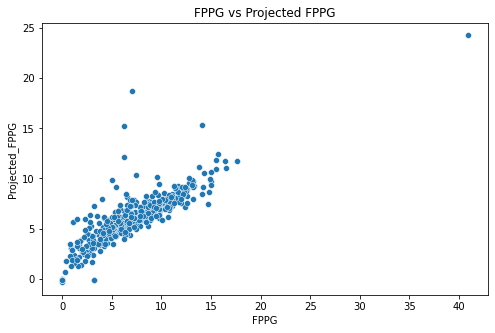

In [34]:
#### graph for visual
plt.figure(figsize=(8,5))
sns.scatterplot(data=batter_test, x='FPPG', y='Projected_FPPG')
plt.title('FPPG vs Projected FPPG');

In [9]:
# dataframe of coefs
coef_df = pd.DataFrame(zip(X.columns, linreg.coef_), columns=['Feature', 'Coeficient'])
coef_df.sort_values(by='Coeficient', inplace=True)

In [10]:
coef_df

,Feature,Coeficient
0,GMS,-3.086197
3,H,-0.888016
12,TB,-0.617851
13,AVG,-0.486460
6,HR,-0.277104
4,2B,-0.186493
5,3B,-0.075215
8,BB,-0.055341
11,CS,-0.028871
10,SB,0.277466


# Note:

---

# Pitcher Data

In [11]:
# read in pitcher training data
pitcher_train = pd.read_csv('../Modeling_Data/pitcher_data_modeling.csv')
# read in batter testing data
pitcher_test = pd.read_csv('../Modeling_Data/pitcher_test_data.csv')

In [12]:
# set up X and y from training data
X = pitcher_train.drop(columns=['Name', 'Team', 'POS', 'PTS', 'FPPG'])
y = pitcher_train['FPPG']

In [13]:
# scale data
sc = StandardScaler()
# fit and transform X
X_sc = sc.fit_transform(X)

In [14]:
# instaniate and fit default linear regression 
linreg = LinearRegression()
linreg.fit(X_sc, y)

LinearRegression()

In [15]:
# generate predictions on testing data with grid
# step 1, create testing df
test_df = pitcher_test.drop(columns=['Name', 'Team', 'Pos', 'PTS', 'FPPG'])
# scale test_df to pass to predictions
test_df_sc = sc.transform(test_df)
# step 2, generate predictions using testing df save to original testing data
pitcher_test['Projected_FPPG'] = linreg.predict(test_df_sc)

In [30]:
# score with RMSE
mean_squared_error(y_true=pitcher_test['FPPG'], y_pred=pitcher_test['Projected_FPPG'], squared=False)

9.1958328205127

In [31]:
# describe for standard deviation on data
pitcher_test['FPPG'].describe()

count    514.000000
mean      12.726196
std       11.219599
min        0.800000
25%        4.919643
50%        7.166667
75%       19.583333
max       61.600000
Name: FPPG, dtype: float64

In [38]:
pitcher_test['Projected_FPPG'].describe()

count    514.000000
mean      16.887298
std        7.092232
min       -4.008248
25%       11.895799
50%       15.312038
75%       21.050279
max       40.656675
Name: Projected_FPPG, dtype: float64

In [39]:
pitcher_test.to_csv('../Projections/slides2.csv')

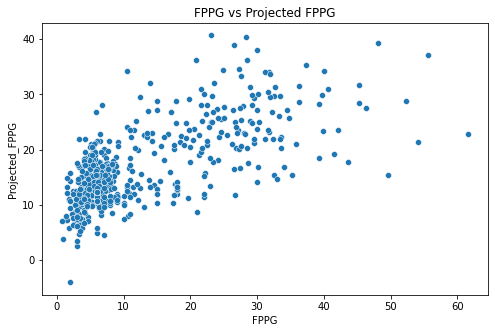

In [17]:
# graph for visual
plt.figure(figsize=(8,5))
sns.scatterplot(data=pitcher_test, x='FPPG', y='Projected_FPPG')
plt.title('FPPG vs Projected FPPG');

In [18]:
# dataframe of coefs
coef_df = pd.DataFrame(zip(X.columns, linreg.coef_), columns=['Feature', 'Coeficient'])
coef_df.sort_values(by='Coeficient', inplace=True)

In [19]:
coef_df

,Feature,Coeficient
13,WHIP,-31.130656
2,GMS,-4.012871
12,ERA,-1.133364
6,H,-0.723690
7,R,-0.619644
9,HR,-0.214696
4,SV,-0.019858
1,L,0.170519
8,ER,0.196460
0,W,0.980298


# Note:

---